In [1]:
import sys, os
import numpy as np
from tqdm import tqdm
import glob

import matplotlib.pyplot as plt
import tikzplotlib

working_path = os.path.join(os.path.dirname(os.getcwd()), '')
parent_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), '')

sys.path.append(working_path)
sys.path.append(parent_path)

In [2]:
STLSTM_t32_d32_file = "/home/roland/Projekte/Tests/FromSurface2DepthKedro/data/05_validation/regimeB/exp2/STLSTM_t32_d32_Y_test_00.npy"
STLSTM_t32_d32 = np.load(STLSTM_t32_d32_file)

In [3]:
mae_file_path = "/home/roland/Projekte/Tests/FromSurface2DepthKedro/data/05_validation/regimeB/exp3"
files_prefix = "STLSTM_t32_d_"
files = glob.glob(os.path.join(mae_file_path, files_prefix + "*"))

os.path.basename(files[0])

'STLSTM_t32_d_16_Y_test_00.npy'

In [4]:
MAE = dict()
for file in files:
    basename = os.path.basename(file)
    MAE[basename] = np.load(file)[0]
    
MAE

{'STLSTM_t32_d_16_Y_test_00.npy': 0.17153488,
 'STLSTM_t32_d_21_Y_test_00.npy': 0.27369112,
 'STLSTM_t32_d_24_Y_test_00.npy': 0.34416214,
 'STLSTM_t32_d_10_Y_test_00.npy': 0.07403217,
 'STLSTM_t32_d_20_Y_test_00.npy': 0.27158257,
 'STLSTM_t32_d_26_Y_test_00.npy': 0.35964203,
 'STLSTM_t32_d_25_Y_test_00.npy': 0.35679343,
 'STLSTM_t32_d_4_Y_test_00.npy': 0.022650605,
 'STLSTM_t32_d_9_Y_test_00.npy': 0.0599954,
 'STLSTM_t32_d_30_Y_test_00.npy': 0.36310425,
 'STLSTM_t32_d_22_Y_test_00.npy': 0.30565667,
 'STLSTM_t32_d_6_Y_test_00.npy': 0.03210528,
 'STLSTM_t32_d_7_Y_test_00.npy': 0.25636694,
 'STLSTM_t32_d_11_Y_test_00.npy': 0.07701561,
 'STLSTM_t32_d_0_Y_test_00.npy': 0.013739127,
 'STLSTM_t32_d_17_Y_test_00.npy': 0.18679018,
 'STLSTM_t32_d_1_Y_test_00.npy': 0.01634865,
 'STLSTM_t32_d_5_Y_test_00.npy': 0.026764845,
 'STLSTM_t32_d_18_Y_test_00.npy': 0.21250062,
 'STLSTM_t32_d_14_Y_test_00.npy': 0.12554169,
 'STLSTM_t32_d_8_Y_test_00.npy': 0.045662243,
 'STLSTM_t32_d_3_Y_test_00.npy': 0.1873

In [5]:
def fromDict2Point(number):
    for key, values in MAE.items():
        if f"_{number}_" in key:
            #print(key)
            return MAE[key]
    print(f'Number {number} not existent')
    return None

series = np.array([fromDict2Point(num) for num in range(32)])

Number 12 not existent
Number 15 not existent
Number 19 not existent
Number 23 not existent
Number 27 not existent
Number 29 not existent
Number 31 not existent


<IPython.core.display.Javascript object>


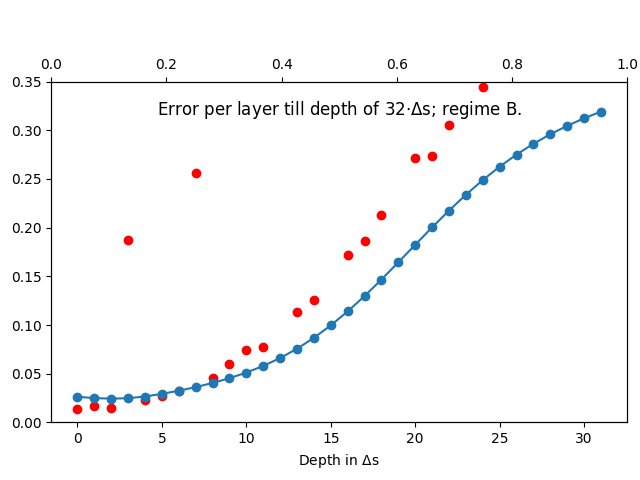

In [7]:
%matplotlib notebook

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.subplots_adjust(left=0.08, right=0.98, top=0.83, bottom=0.12)

ax2 = ax1.twiny()


ax1.scatter(range(32),series, c="r")
ax1.plot(STLSTM_t32_d32)
ax1.set_ylim([0,0.35])
ax1.set_xlabel("Depth in $\Delta$s")

ax1.scatter(range(32), STLSTM_t32_d32)

plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = -24  # pad is in points...

plt.title("Error per layer till depth of 32$\cdot\Delta$s; regime B.")

tikzplotlib.save("test.tex")